# The original Kaggle competition can be found here:

https://www.kaggle.com/c/asap-aes/data

# Exploratory Data Analysis and Topic Modeling

This section will cover:

* initial exploratory analysis
* grammar and spelling correction 
* feature extraction with SpaCy 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import language_tool_python
from nltk.corpus import stopwords
# import enchant
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
import pickle as pkl

import seaborn as sns

from string import punctuation

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

import pyLDAvis
from pyLDAvis.sklearn import prepare

plt.style.use('seaborn-colorblind')

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_colwidth', 100)

pyLDAvis.enable_notebook()
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi']= 100

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [ ]:
training_set  = pd.read_csv(r'C:\Users\wesam\OneDrive\سطح المكتب\مشروع التخرج\project\dataset\training_set_rel3.tsv', sep='\t', encoding = "ISO-8859-1")\
            .rename(columns={'essay_set': 'topic', 'domain1_score': 'target_score', 'domain2_score': 'topic2_target'})

training_set.head()

essay_id  topic                                                                                                essay  rater1_domain1  rater2_domain1  rater3_domain1  target_score  rater1_domain2  rater2_domain2  topic2_target  rater1_trait1  rater1_trait2  rater1_trait3  rater1_trait4  rater1_trait5  rater1_trait6  rater2_trait1  rater2_trait2  rater2_trait3  rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  rater3_trait2  rater3_trait3  rater3_trait4  rater3_trait5  rater3_trait6
0         1      1  Dear local newspaper, I think effects computers have on people are great learning skills/affects...               4               4             NaN             8             NaN             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
1         2      1  Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and...               5               4             NaN             9             NaN             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
2         3      1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more people use computers, but not everyone agrees that this...               4               3             NaN             7             NaN             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
3         4      1  Dear Local Newspaper, @CAPS1 I have found that many experts say that computers do not benifit ou...               5               5             NaN            10             NaN             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
4         5      1  Dear @LOCATION1, I know having computers has a positive effect on people. The computers connect ...               4               4             NaN             8             NaN             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN

In [ ]:
training_set .shape

(12976, 28)

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   topic           12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   target_score    12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   topic2_target   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [ ]:
training_set= training_set.dropna(axis=1)
training_set= training_set.drop(columns=['rater1_domain1', 'rater2_domain1'])

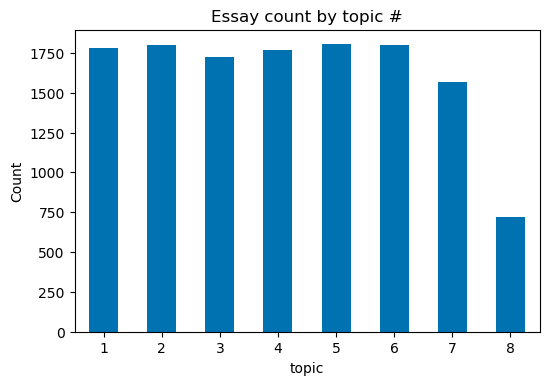

In [ ]:
training_set.groupby('topic').agg('count').plot.bar(y='essay', rot=0, legend=False)
plt.title('Essay count by topic #')
plt.ylabel('Count')
plt.show()

In [ ]:
training_set.groupby(['topic'])['target_score'].agg(['min','max','count','nunique'])

min  max  count  nunique
topic                          
1        2   12   1783       11
2        1    6   1800        6
3        0    3   1726        4
4        0    3   1770        4
5        0    4   1805        5
6        0    4   1800        5
7        2   24   1569       23
8       10   60    723       34

In [ ]:
minimum_scores = [-1, 2, 1, 0, 0, 0, 0, 0, 0]
maximum_scores = [-1, 12, 6, 3, 3, 4, 4, 30, 60]

In [ ]:
# Count characters and words for each essay
training_set['word_count'] = training_set['essay'].str.strip().str.split().str.len()

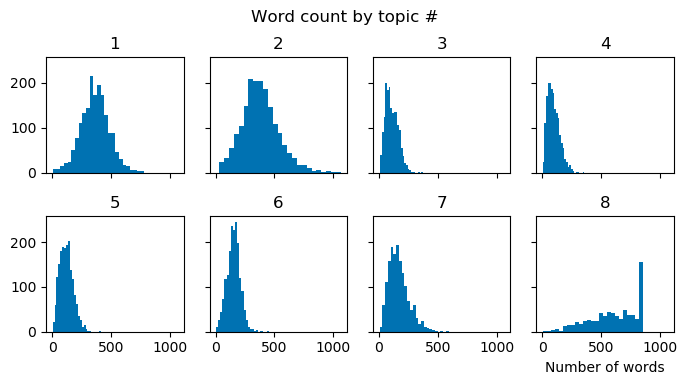

In [ ]:
training_set.hist(column='word_count', by='topic', bins=25, sharey=True, sharex=True, layout=(2, 4), figsize=(7,4), rot=0) 
plt.suptitle('Word count by topic #')
plt.xlabel('Number of words')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

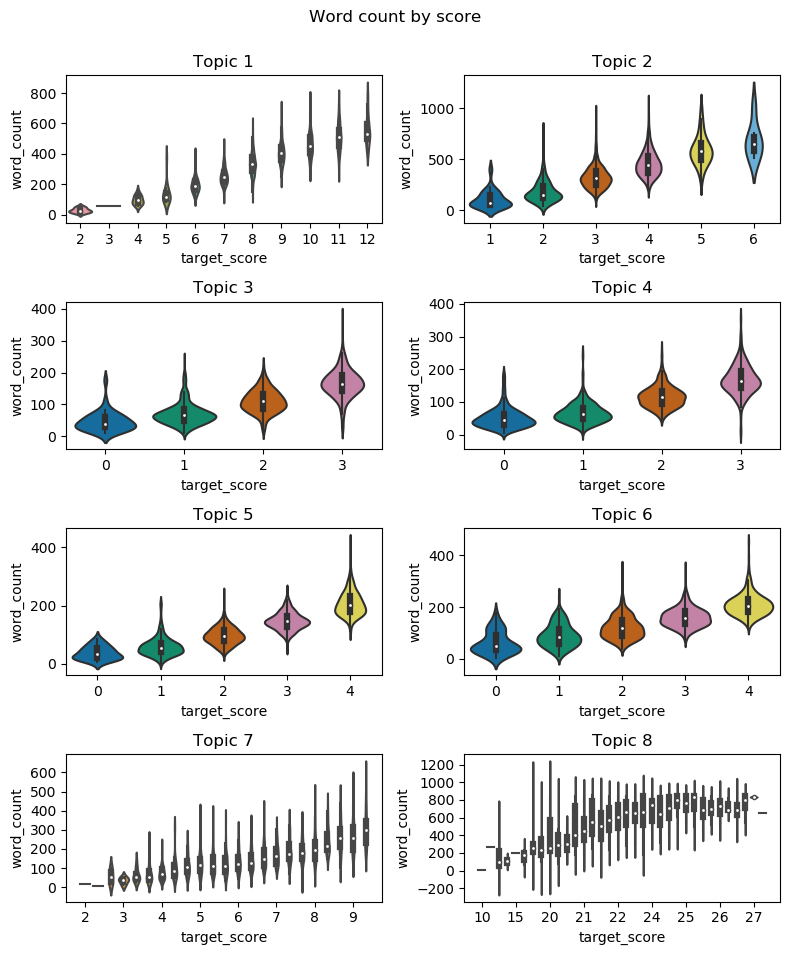

In [ ]:
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(8,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.violinplot(x='target_score', y='word_count', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Word count by score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

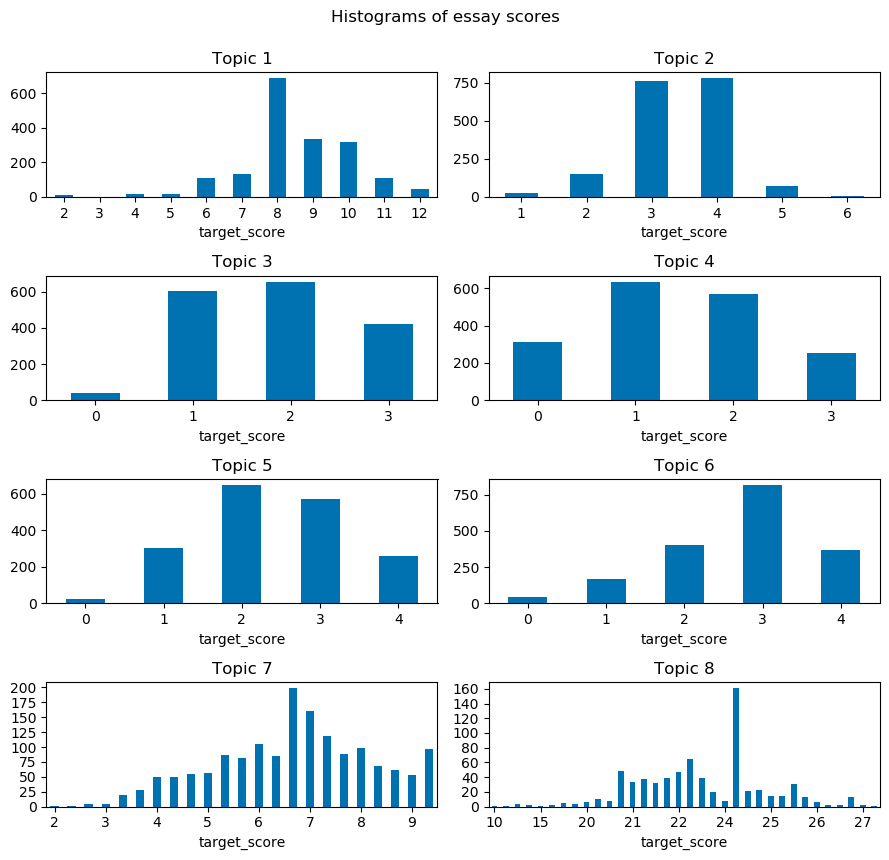

In [ ]:
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(9,9), sharey=False)
for i in range(4):
    for j in range(2):
        topic_number += 1
        training_set[training_set['topic'] == topic_number]\
            .groupby('target_score')['essay_id']\
            .agg('count')\
            .plot.bar(ax=ax[i, j], rot=0)
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Histograms of essay scores')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Essay processing:

1. Language correction with languagetool (add number of corrections as feature)
2. Sentence tokenization with Spacy
3. Sentence count and length
4. Word tokenize with Spacy
5. Word token classification (punctuation, stop words and anonymized entities, pos, ent)
6. Document similarity (based on arbitrary high scoring essay for each topic)

## Grammar and spelling

As to be expected with student essays, many essays exhibit grammar and spelling errors. 

Parts-of-speech (POS) and named-entity-recognition (NER) is hampered in part by the lack of consitent spelling and punctuation. Therefore, the essays will be corrected using languagetool and the nlp parsing will be performed with Spacy on the corrected essays.

In [ ]:
"""
use language tool to correct for most spelling and grammatical errors. Also count the applied corrections. 
Using language_check python wrapper for languagetool:
https://www.languagetool.org/dev
"""
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

In [ ]:
training_set['matches'] = training_set['essay'].apply(lambda essay: tool.check(essay))

In [ ]:
training_set['corrections_len'] =training_set.apply(lambda l: len(l['matches']), axis=1)

In [ ]:
training_set['corrected'] = training_set.apply(lambda l: tool.correct(l['essay']), axis=1)

In [ ]:
print('Original:')
print(training_set.essay[18])
print('Corrected with languagetool:')
print(training_set.corrected[18])

In [ ]:
# save work
# training_set.to_pickle('training_corr.pkl')

In [ ]:
training_set = pd.read_pickle('training_corr.pkl')

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation
from datetime import datetime

## NLP with SpaCy

Although much of the analysis could be performed with other NLP packages, SpaCy was chosen due to its combination of speed and simplicity.

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
sents = []
tokens = []
lemma = []
pos = []
ner = []

stop_words = set(STOP_WORDS)
stop_words.update(punctuation) # remove it if you need punctuation 

nlp = spacy.load('en_core_web_sm')

t0 = datetime.now()

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for essay in nlp.pipe(training_set['corrected'], batch_size=100, n_process=3):
    if essay.is_parsed:
        tokens.append([e.text for e in essay])
        sents.append([sent.text.strip() for sent in essay.sents])
        pos.append([e.pos_ for e in essay])
        ner.append([e.text for e in essay.ents])
        lemma.append([n.lemma_ for n in essay])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

training_set['tokens'] = tokens
training_set['lemma'] = lemma
training_set['pos'] = pos
training_set['sents'] = sents
training_set['ner'] = ner

t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

Processing time: 0:04:17.692295


In [ ]:
#training_set.to_pickle('training_spacy.pkl')

In [ ]:
training_set = pd.read_pickle('training_spacy.pkl')

In [ ]:
training_set[['tokens', 'pos', 'sents', 'ner']].head()

tokens  \
0  [Dear, local, newspaper, ,, I, think, effects,...   
1  [Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...   
2  [Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...   
3  [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...   
4  [Dear, @LOCATION1, ,, I, know, having, compute...   

                                                 pos  \
0  [ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...   
1  [ADJ, NOUN, ADV, PUNCT, PRON, VERB, SCONJ, VER...   
2  [ADJ, PUNCT, PROPN, ADV, PROPN, ADJ, CCONJ, AD...   
3  [PROPN, PROPN, PROPN, PUNCT, PROPN, PRON, AUX,...   
4  [ADJ, PROPN, PUNCT, PRON, VERB, VERB, NOUN, VE...   

                                               sents  \
0  [Dear local newspaper, I think effects compute...   
1  [Dear @CAPS1 @CAPS2, I believe that using comp...   
2  [Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...   
3  [Dear Local Newspaper, @CAPS1 I have found tha...   
4  [Dear @LOCATION1, I know having computers has ...   

                                                 ner  
0         [@ORGANIZATION2, @CAPS1, Facebook, @CAPS2]  
1  [@CAPS1, millions, one, Facebook, one, million...  
2                   [today, @CAPS4, one, a thousand]  
3  [@CAPS1, @PERSON1, @PERSON2, @CAPS3, @PERCENT2...  
4      [First, one, Secondly, one, only one, @CAPS1]

In [ ]:
# Lemmatized essays re-joined (list to essay)
training_set['l_essay'] = training_set['lemma'].apply(' '.join)

In [ ]:
training_set.head()

essay_id     topic                                              essay  \
0         1  computer  Dear local newspaper, I think effects computer...   
1         2  computer  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3  computer  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4  computer  Dear Local Newspaper, @CAPS1 I have found that...   
4         5  computer  Dear @LOCATION1, I know having computers has a...   

   target_score  word_count  \
0             8         338   
1             9         419   
2             7         279   
3            10         524   
4             8         465   

                                             matches  corrections_len  \
0  [Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...               16   
1  [Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...               25   
2  [Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...               17   
3  [Offset 86, length 7, Rule ID: MORFOLOGIK_RULE...               29   
4  [Offset 177, length 8, Rule ID: MORFOLOGIK_RUL...               18   

                                           corrected  \
0  Dear local newspaper, I think effects computer...   
1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3  Dear Local Newspaper, @CAPS1 I have found that...   
4  Dear @LOCATION1, I know having computers has a...   

                                              tokens  \
0  [Dear, local, newspaper, ,, I, think, effects,...   
1  [Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...   
2  [Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...   
3  [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...   
4  [Dear, @LOCATION1, ,, I, know, having, compute...   

                                               lemma  \
0  [dear, local, newspaper, ,, I, think, effect, ...   
1  [dear, @CAPS1, @caps2, ,, I, believe, that, us...   
2  [dear, ,, @CAPS1, @caps2, @CAPS3, More, and, m...   
3  [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...   
4  [dear, @LOCATION1, ,, I, know, have, computer,...   

                                                 pos  \
0  [ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...   
1  [ADJ, NOUN, ADV, PUNCT, PRON, VERB, SCONJ, VER...   
2  [ADJ, PUNCT, PROPN, ADV, PROPN, ADJ, CCONJ, AD...   
3  [PROPN, PROPN, PROPN, PUNCT, PROPN, PRON, AUX,...   
4  [ADJ, PROPN, PUNCT, PRON, VERB, VERB, NOUN, VE...   

                                               sents  \
0  [Dear local newspaper, I think effects compute...   
1  [Dear @CAPS1 @CAPS2, I believe that using comp...   
2  [Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...   
3  [Dear Local Newspaper, @CAPS1 I have found tha...   
4  [Dear @LOCATION1, I know having computers has ...   

                                                 ner  \
0         [@ORGANIZATION2, @CAPS1, Facebook, @CAPS2]   
1  [@CAPS1, millions, one, Facebook, one, million...   
2                   [today, @CAPS4, one, a thousand]   
3  [@CAPS1, @PERSON1, @PERSON2, @CAPS3, @PERCENT2...   
4      [First, one, Secondly, one, only one, @CAPS1]   

                                             l_essay  
0  dear local newspaper , I think effect computer...  
1  dear @CAPS1 @caps2 , I believe that use comput...  
2  dear , @CAPS1 @caps2 @CAPS3 More and more peop...  
3  Dear Local Newspaper , @CAPS1 I have find that...  
4  dear @LOCATION1 , I know have computer have a ...

In [ ]:
pip install wordcloud

In [ ]:
training_set = pd.read_pickle('/content/drive/MyDrive/training_features.pkl')

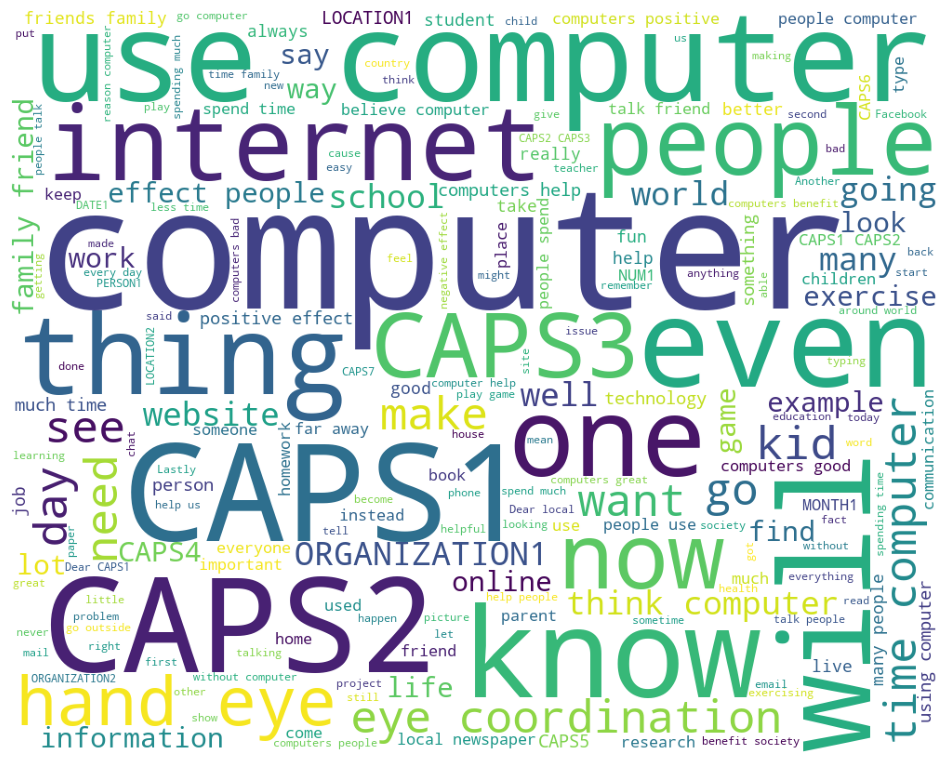

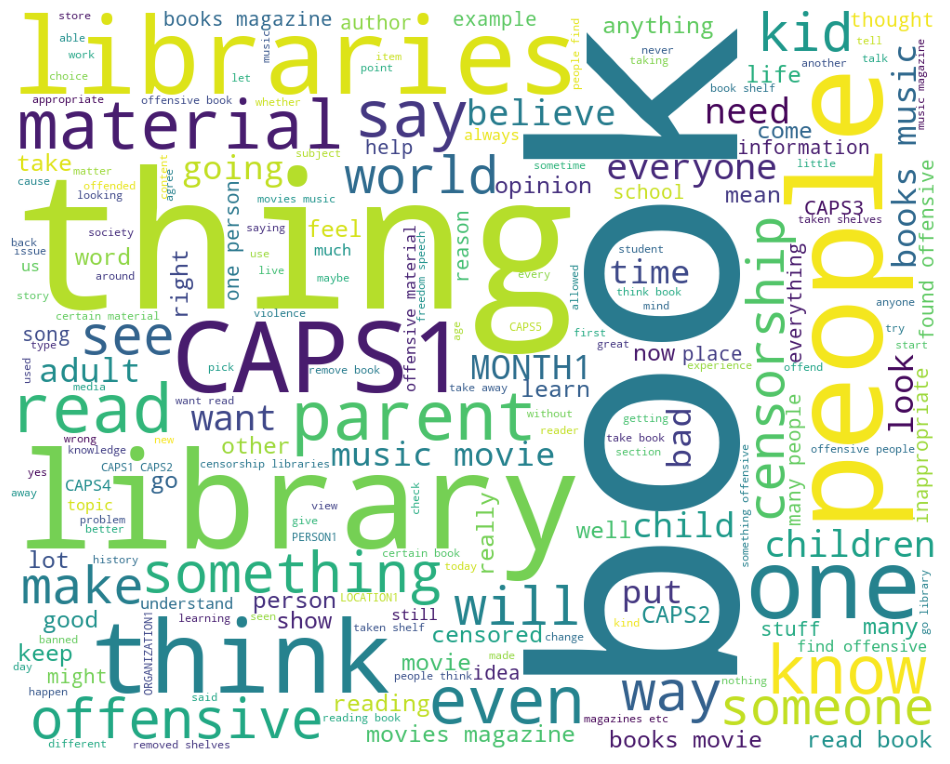

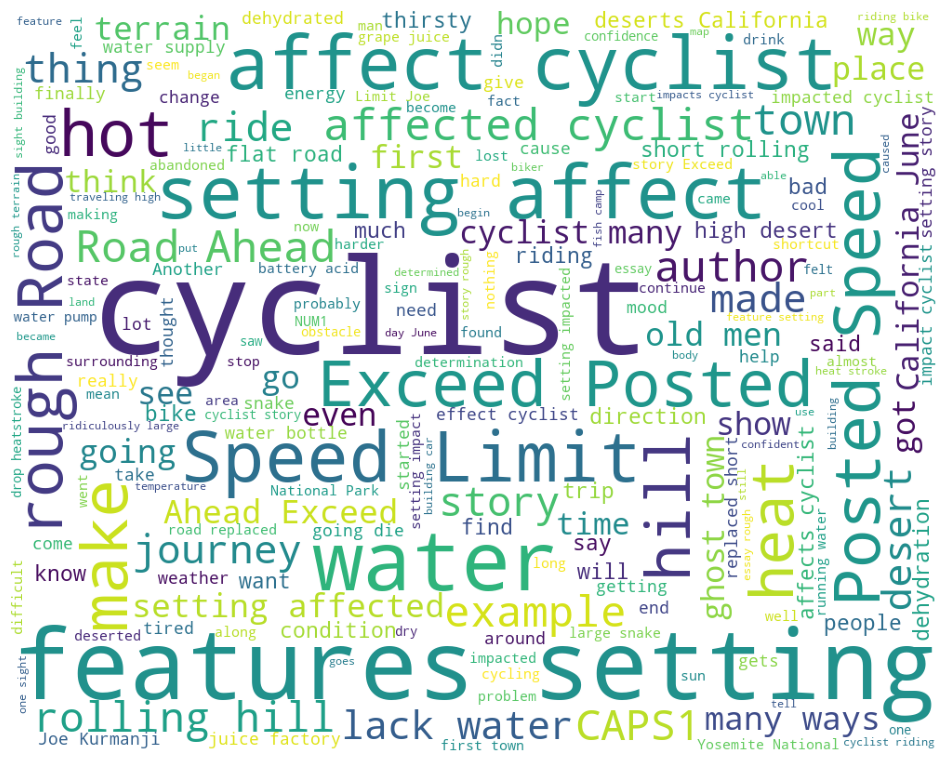

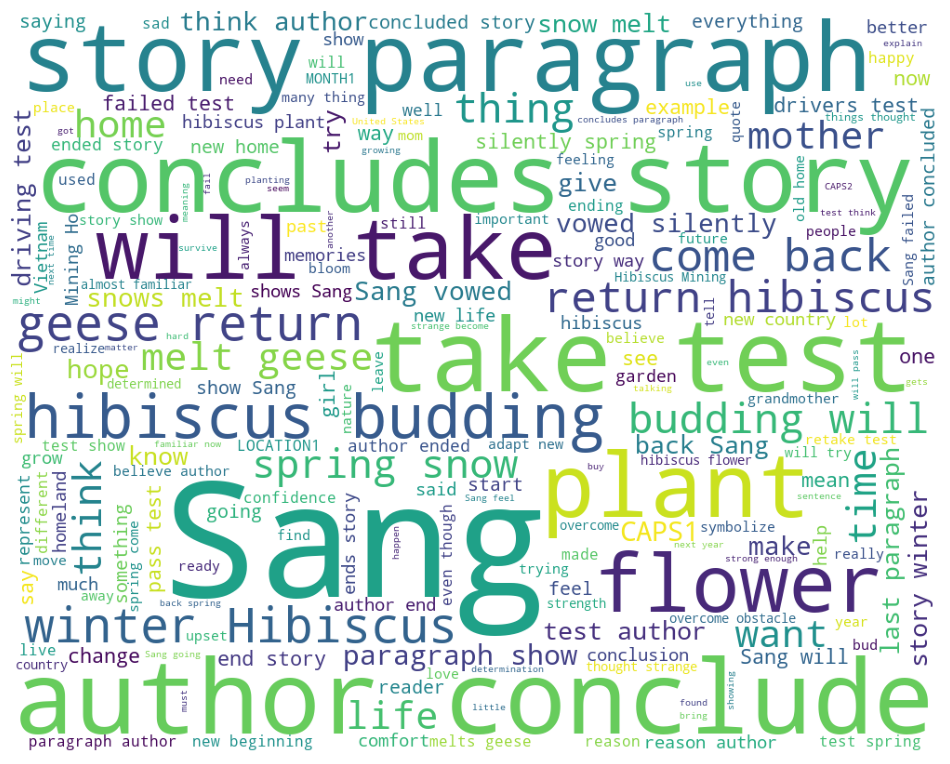

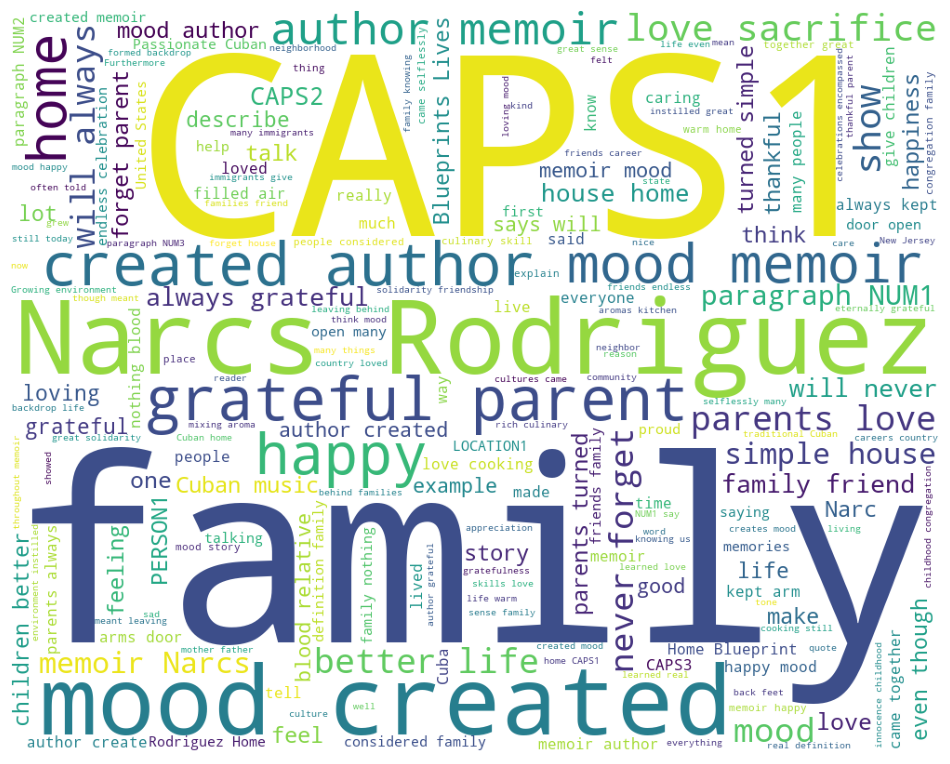

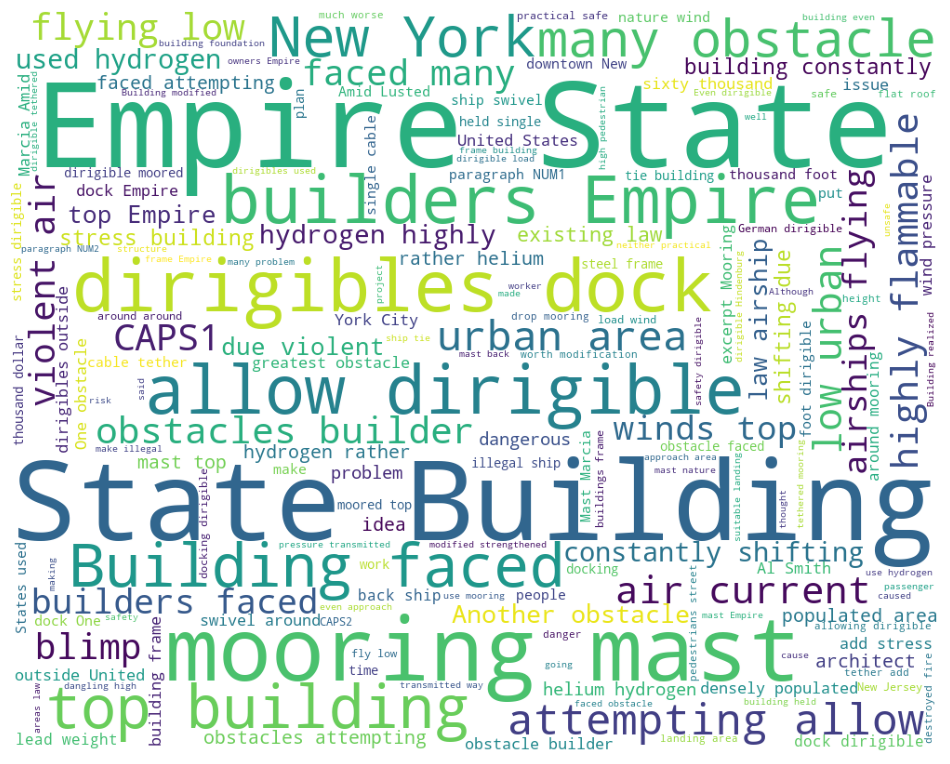

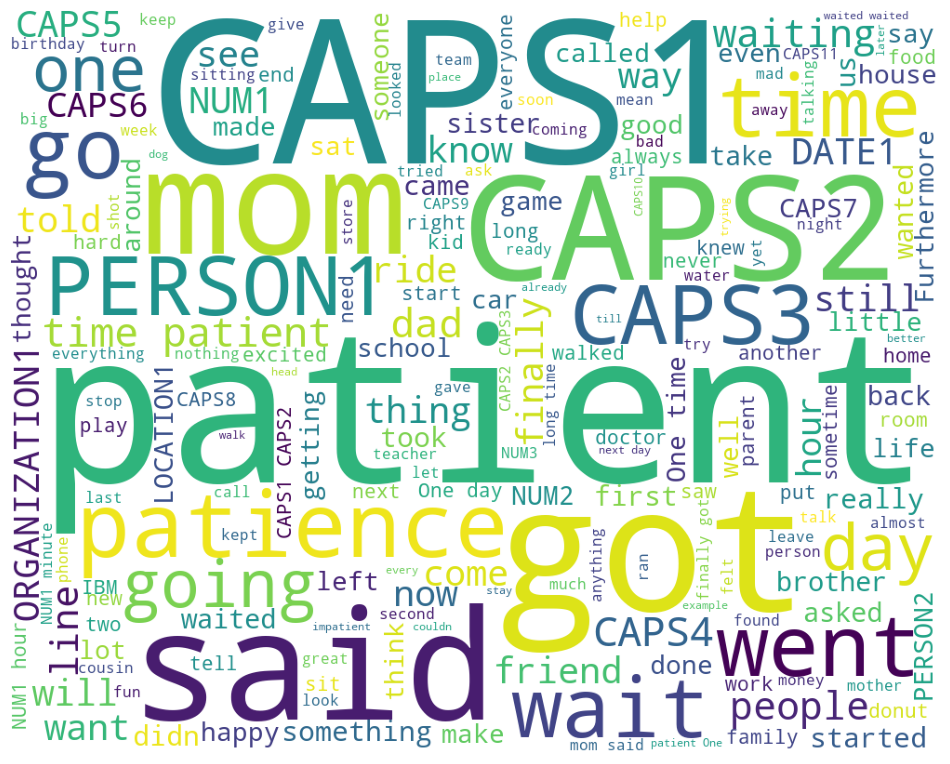

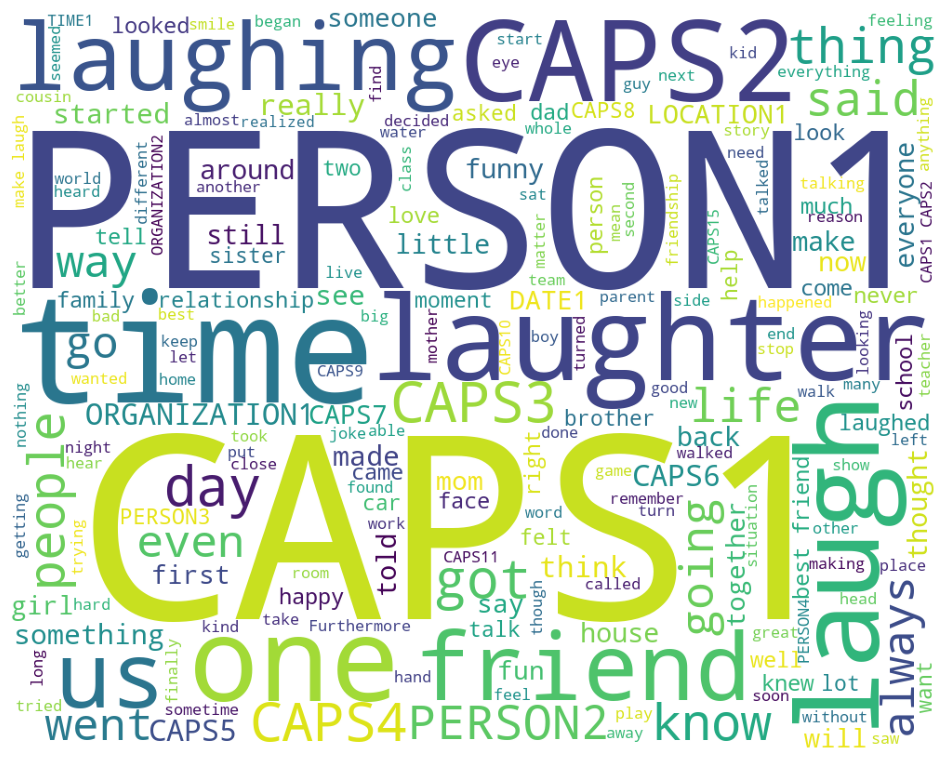

In [ ]:
from wordcloud import WordCloud
for topic in range(1,9):
        class_text = " ".join(training_set[training_set.topic==topic]['corrected'].tolist())
        wordcloud = WordCloud(width = 1000, height = 800,background_color ='white',min_font_size = 10).generate(class_text)
        plt.figure(figsize = (12,12))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        print()

In [ ]:
# Replace topic numbers with meaningful one-word summary:
topic_dict = {'topic':{1: 'computer', 
                       2: 'censorship', 
                       3: 'cyclist', 
                       4: 'hibiscus', 
                       5: 'mood', 
                       6: 'dirigibles', 
                       7: 'patience', 
                       8: 'laughter'}}

training_set.replace(topic_dict, inplace=True)
